This notebook is to go through basic procedures of genetic algorithm (GA).

References:

https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/, 

https://www.codewars.com/kata/567d609f1c16d7369c000008

## Step 1: 

https://www.codewars.com/kata/567d609f1c16d7369c000008

A genetic algorithm is based in groups of chromosomes, called populations. To start our population of chromosomes we need to generate random binary strings with a specified length.

In this kata you have to implement a function ```generate``` that receives a ```length``` and has to return a random binary string with length characters.

(In practice, any real-life input will be first converted into a bit string, which is another big topic and we will touch it later...)

In [1]:
import numpy as np

In [2]:
#we use ranint to randomly generate 0 or 1
dig_series_text = str(np.random.randint(0, 2, size = 4))

In [3]:
dig_series_no_bracket = dig_series_text[1:-1]

In [4]:
def generate(length:int):
    """
    example, length = 4, return a random series with 4 bits, for example, 1000, 1001, ..., 1111
    note that this randint is returning a np.ndarray, if directly convert to string, it will contain space and brackets..
    """
    dig_array = np.random.randint(0, 2, size = length)
    dig_series_text = str(dig_array)[1:-1].replace(" ", "").replace("\n", "")
    
    return dig_series_text

In [5]:
#example of step 1
generate(100)

'0001100010010111111011101110000100111110101111001010000100000111111101010001001101111100001000101110'

## Step 2 Mutation

https://www.codewars.com/kata/genetic-algorithm-series-number-2-mutation

Mutation is a genetic operator used to maintain genetic diversity from one generation of a population of genetic algorithm chromosomes to the next.

For example, 1 to 0 or 0 to 1, with a given probability.

The "chromosomes" mentioned in the question refers to the ```dig_series_text``` returned in the ```generate``` step.


We use the philosophy of monte-carlo (reject/accept regime) here:

- Generate a random number between 0 and 1.
- For a given probability ```prob```, if the random number is below this probability, accept the change (i.e., mutate); otherwise, reject the change (i.e., remain).

In [6]:
mutate_rule = {
    '0' : '1',
    '1' : '0'
}


def mutation(chrom:str, prob:float) -> str:
    """
    prob is the probability for a given chromosomes, i.e., '0' or '1', to mutate into the opposite.
    """
    dig_series_after_mutate = []
    for dig_text in chrom:
        #convert text to int
        dig = int(dig_text)
        
        #generate a random number to compare with acceptance threshold. i.e., prob
        mutate_this_dig = np.random.rand()
        if mutate_this_dig < prob:
            dig_series_after_mutate.append(mutate_rule[dig_text])
        #else remain same
        else:
            dig_series_after_mutate.append(dig_text)
    
    mutated_chrom = "".join(dig_series_after_mutate)
    return mutated_chrom

In [7]:
length = 100
prob = 0.5
chrom = generate(length)
print(f"original chromosomes:\n {chrom}.\n")
mutated_chrom = mutation(chrom, prob)
print(f"mutated chromosomes:\n {mutated_chrom}.\n")

original chromosomes:
 0100110110001000100111101101001101110001001010100000011100000111101111001111001011010010000111001010.

mutated chromosomes:
 0000110100001010100100011110011000000100000000110101001001110011111010010001100010111110111101011000.



## Step 3 Crossover

https://www.codewars.com/kata/genetic-algorithm-series-number-3-crossover

In genetic algorithms, crossover is a genetic operator used to vary the programming of chromosomes from one generation to the next.

The one-point crossover consists in swapping one's chromosome part with another in a specific given point/cut point (```index```). 

For example, the cut point index is set as 4, a chromosome 1 "10101111" and a chromosome 2 "11011001" will be cut after the 4th digit (0), and everything after the 4th digit will be swapped with each other, yielding [chromosome 3, chromosome 4]:  ["10101001", "11011111"].

In [8]:
def crossover(chrom_1, chrom_2, cut_point_index):
    chrom_3_list = []
    chrom_4_list = []
    for i in range(len(chrom_1)):
        if i < cut_point_index:
            chrom_3_list.append(chrom_1[i])
            chrom_4_list.append(chrom_2[i])
        else:
            chrom_3_list.append(chrom_2[i])
            chrom_4_list.append(chrom_1[i])
    chrom_3 = "".join(chrom_3_list)
    chrom_4 = "".join(chrom_4_list)
    return chrom_3, chrom_4
    

In [9]:
chrom_1 = mutation(generate(length), prob)
chrom_2 = mutation(generate(length), prob)

cut_point_index = 10

chrom_3, chrom_4 = crossover(chrom_1, chrom_2, cut_point_index)

print(f"{chrom_1=},\n{chrom_2=},\n{chrom_3=},\n{chrom_4=}\n")

chrom_1='1111000011110101010110111011001000001000001111001010100001110101101011011101010000011011100010001011',
chrom_2='1111101000100010100010010010100011111010100011000101000111111111110010001111010000001001011000100001',
chrom_3='1111000011100010100010010010100011111010100011000101000111111111110010001111010000001001011000100001',
chrom_4='1111101000110101010110111011001000001000001111001010100001110101101011011101010000011011100010001011'



## Step 4 Get population and fitness

https://www.codewars.com/kata/genetic-algorithm-series-number-4-get-population-and-fitnesses

This step will compare the difference between the given chromosome with the ```ideal``` situation, quantified by a ```fitness``` function.

The ```fitness``` function is another big topic related to how to properly optimise the outcome.. Here we use the given example in the codewars keta.

```fitness``` can reflect the quality of individual. 

For example, fitness between 0.8 to 1 means this chromosome is very healthy and very likely to survive, thus it shares the largest portion of roulette wheel, i.e., largest probability to survive (56% for example).

Fitness between 0.4 to 0.8 means this chromosome is okay to live to, let's say, average life span, so second large portion of the wheel...

Fitness between 0.2 to 0.4 means this chromosome is not likely to survive till adulthood, maybe only a few percentage.

Fitness below 0.2 means, very likely, this chromosome cannot even develop into an embryo, perhaps smaller than 1%.

In [10]:
ideal = generate(length)
print(f"{ideal=}\n")

ideal='0111000000000011001101101010011101010011011010010010100011011100100101010111001011111000110111110101'



In [11]:
def get_fitness(ideal):
    def fitness(test):
        """
        test is the test chromosome to compare with the ideal chromosome
        the similarity/fitness between test and ideal is quantified by calculating how many digits match with each other
        """
        match_record = 0
        for i, base in enumerate(test):
            if base == ideal[i]:
                match_record += 1
        this_fitness = float(match_record/len(ideal))
        return this_fitness
    return fitness
    

def generate_population(length, pop_size):
    """
    generate pop_size chromosomoes with given length
    """
    population = []
    for i in range(pop_size):
        population.append(generate(length))
    return population


In [12]:
pop_size = 10
population = generate_population(length, pop_size)
print(f"{population=}\n")

population=['0101010100100111100100010111110110101110010111000100100001111111000110110010101100011010010100110001', '0101000100111000010011011111001101011011111111101100101100110101011100101101101110000110101001111011', '0001111011011100010010011000011100011110000111111010100100111001000010100000001100101111110001001010', '1111110111001000110100010001111000000111010100000110011000100001100011010100010001110010010110000001', '1000010000111111010110110101011000000001010001001010110000110000000101100011000100010110000001101011', '0000000110010010000100011100000101101000100010100011001111001110011011111101001001011001011101110000', '1001000010101010000100001110001101111001011010010010101011110110101000100010011111101101011010000111', '1111001110111101001000001110000110111100110111111110000011100101011101100001000111100100010110111100', '1001000001000111010011100100010101001000010001110000101001011110010011100000110101001000100110010011', '011000111111110110000011011011010010011110111100111

In [13]:
def map_popluation_fit(population, fitness):
    pop_fit_map = {}
    for test in population:
        this_fitness = fitness(test)
        pop_fit_map[test] = this_fitness
    return pop_fit_map
        

In [14]:
map_popluation_fit(population, get_fitness(ideal))

{'0101010100100111100100010111110110101110010111000100100001111111000110110010101100011010010100110001': 0.52,
 '0101000100111000010011011111001101011011111111101100101100110101011100101101101110000110101001111011': 0.45,
 '0001111011011100010010011000011100011110000111111010100100111001000010100000001100101111110001001010': 0.4,
 '1111110111001000110100010001111000000111010100000110011000100001100011010100010001110010010110000001': 0.48,
 '1000010000111111010110110101011000000001010001001010110000110000000101100011000100010110000001101011': 0.47,
 '0000000110010010000100011100000101101000100010100011001111001110011011111101001001011001011101110000': 0.53,
 '1001000010101010000100001110001101111001011010010010101011110110101000100010011111101101011010000111': 0.62,
 '1111001110111101001000001110000110111100110111111110000011100101011101100001000111100100010110111100': 0.5,
 '1001000001000111010011100100010101001000010001110000101001011110010011100000110101001000100110010011': 0.54,
 '0

## Step 5

Ideally, we will now sort all the chromosomes according to the fitness.. but sortings things is expensive, especially if we have millions of populations.. (even the best sorting algorithm still needs $O(n\log{n})$ complexity, and the implementation is not very straightforward).

SO here we use monte-carlo again!

The keta called it Roulette wheel (or Fitness Proportionate) selection.

https://www.codewars.com/kata/genetic-algorithm-series-number-5-roulette-wheel-selection

The basic idea is to set different levels of (discrete) probability thresholds, which matches with different quality of the species.

Populations with the best fitnesses should cover the largest proportion.

The probability to select each individual, $P_i = \frac{f_i}{\sum(f_i)}$

and that is the function of ```select```

In [35]:
#now it will be a bit abstract...
#This is monte-carlo again.
#we will generate a series of probability that each individual in the current population will be selected
#we will generate another series of random number between 0 to 1, with the length equals the size of population before mutation happens
#then, without doing any sorting, we start from the first element in the current population, substract its select_probability from this round of random number
#until 0 or negative
#the last number that causes it cross 0 will be selected.

#here's an example
initial_size_of_population = 10
size_of_population_after_mutation = 20

#this is an imaginary series of probability to select each individual, in practice it will be the normalised fitness
imagine_probability_of_selection = np.random.rand(size_of_population_after_mutation)
print(f"{imagine_probability_of_selection=}")

#now we generate another series of lucky numbers, with the size of initial population
lucky_numbers = np.random.rand(initial_size_of_population)
print(f"{lucky_numbers=}")

#now we will select the subset as the initial population for the next generation
selected_kid_id = []
selected_kid_prob = []

all_prob_of_sel = list(imagine_probability_of_selection.copy())

for lucky_number in lucky_numbers:    
    
    for i, prob_to_select_this_kid in enumerate(all_prob_of_sel):
        
        if i in selected_kid_id:
            pass
        else:
            lucky_number -= prob_to_select_this_kid

            if lucky_number < 0:
                selected_kid_id.append(i)
                selected_kid_prob.append(prob_to_select_this_kid)
                
                break

print(f"{selected_kid_id=}")
print(f"{selected_kid_prob=}")
            
        
    
    


imagine_probability_of_selection=array([0.29507784, 0.54147848, 0.54768894, 0.13900405, 0.58317341,
       0.74317987, 0.66575978, 0.51237663, 0.08953776, 0.92297585,
       0.50098437, 0.99866702, 0.15314452, 0.2996206 , 0.32400005,
       0.90468154, 0.86174716, 0.02439504, 0.47103951, 0.45196782])
lucky_numbers=array([0.24082017, 0.78222985, 0.89231747, 0.18615645, 0.14470749,
       0.33715089, 0.37623694, 0.09227549, 0.2657694 , 0.9002774 ])
selected_kid_id=[0, 2, 4, 1, 5, 6, 7, 3, 9, 11]
selected_kid_prob=[0.29507784162554307, 0.5476889357934945, 0.5831734056314569, 0.5414784836363709, 0.7431798656768511, 0.6657597757465468, 0.5123766255153254, 0.13900405410459393, 0.9229758460549944, 0.9986670151061949]


In [29]:
im_list = [1, 2, 3]
im_list.pop(1)
im_list


[1, 3]

In [15]:
def select(population, fitness):
    
    #workout the fitness of all chromosomes in the population
    
    all_fitnesses = []
    for i, chrom in enumerate(population):
        this_fitness = fitness(chrom)
        all_fitnesses.append(this_fitness)
    
    select_prob = []
    
    #prepare for fitness normalisation, get the sum of all fitnesses
    total_fitness = np.sum(all_fitnesses)
    select_prob = np.array(all_fitnesses)/total_fitness
    
    pop_sel_map = {}

    
    for i, chrom in enumerate(population):
        pop_sel_map[chrom] = select_prob[i]
    
    #get all parameters
    all_param_map = {
        "chromosome":population,
        "fitness" : all_fitnesses,
        "select_prob" : select_prob
    }
    
    #select the one by converting pdf to cdf
    cum_select_prob = np.cumsum(select_prob)
    #generate a random number to represent the position when the wheel stops
    lucky_number = np.random.rand()
    
    
    
    
    
    return pop_sel_map, all_param_map

In [16]:
pop_sel_map, all_param_map = select(population, get_fitness(ideal))

In [17]:
all_param_map

{'chromosome': ['0101010100100111100100010111110110101110010111000100100001111111000110110010101100011010010100110001',
  '0101000100111000010011011111001101011011111111101100101100110101011100101101101110000110101001111011',
  '0001111011011100010010011000011100011110000111111010100100111001000010100000001100101111110001001010',
  '1111110111001000110100010001111000000111010100000110011000100001100011010100010001110010010110000001',
  '1000010000111111010110110101011000000001010001001010110000110000000101100011000100010110000001101011',
  '0000000110010010000100011100000101101000100010100011001111001110011011111101001001011001011101110000',
  '1001000010101010000100001110001101111001011010010010101011110110101000100010011111101101011010000111',
  '1111001110111101001000001110000110111100110111111110000011100101011101100001000111100100010110111100',
  '1001000001000111010011100100010101001000010001110000101001011110010011100000110101001000100110010011',
  '01100011111111011000001101101

In [18]:
import pandas as pd

In [19]:
all_pop_info = pd.DataFrame.from_dict(all_param_map)
all_pop_info

,chromosome,fitness,select_prob
0,0101010100100111100100010111110110101110010111...,0.52,0.105051
1,0101000100111000010011011111001101011011111111...,0.45,0.090909
2,0001111011011100010010011000011100011110000111...,0.40,0.080808
3,1111110111001000110100010001111000000111010100...,0.48,0.096970
4,1000010000111111010110110101011000000001010001...,0.47,0.094949
5,0000000110010010000100011100000101101000100010...,0.53,0.107071
6,1001000010101010000100001110001101111001011010...,0.62,0.125253
7,1111001110111101001000001110000110111100110111...,0.50,0.101010
8,1001000001000111010011100100010101001000010001...,0.54,0.109091
9,0110001111111101100000110110110100100111101111...,0.44,0.088889


In [20]:
all_pop_info["select_prob"]

0    0.105051
1    0.090909
2    0.080808
3    0.096970
4    0.094949
5    0.107071
6    0.125253
7    0.101010
8    0.109091
9    0.088889
Name: select_prob, dtype: float64

In [21]:
import matplotlib.pyplot as plt

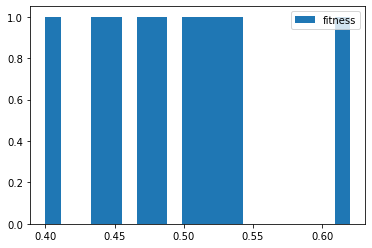

In [22]:
plt.hist(all_pop_info["fitness"], bins = 20, label = "fitness")
plt.legend()

(array([1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([0.08080808, 0.0830303 , 0.08525253, 0.08747475, 0.08969697,
        0.09191919, 0.09414141, 0.09636364, 0.09858586, 0.10080808,
        0.1030303 , 0.10525253, 0.10747475, 0.10969697, 0.11191919,
        0.11414141, 0.11636364, 0.11858586, 0.12080808, 0.1230303 ,
        0.12525253]),
 <BarContainer object of 20 artists>)

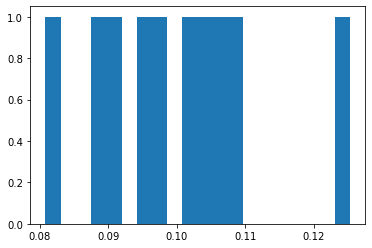

In [23]:
plt.hist(all_pop_info["select_prob"], bins = 20)